# Intersection between MOCs

In [1]:
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.coordinates import Angle, SkyCoord
from astropy.visualization.wcsaxes.frame import EllipticalFrame
from mocpy import MOC, WCS

Let's start by loading a local MOC and plotting it

In [2]:
%%time
m1 = MOC.from_fits("../resources/P-SDSS9-r.fits")

CPU times: user 4 ms, sys: 445 µs, total: 4.44 ms
Wall time: 4.43 ms


Now, we load MOC for GALEX GR6 AIS FUV:

In [3]:
%%time
m2 = MOC.from_fits("../resources/P-GALEXGR6-AIS-FUV.fits")

CPU times: user 2.01 ms, sys: 0 ns, total: 2.01 ms
Wall time: 1.98 ms


CPU times: user 1.25 s, sys: 22.6 ms, total: 1.28 s
Wall time: 1.26 s
CPU times: user 4.94 s, sys: 41.1 ms, total: 4.98 s
Wall time: 4.96 s


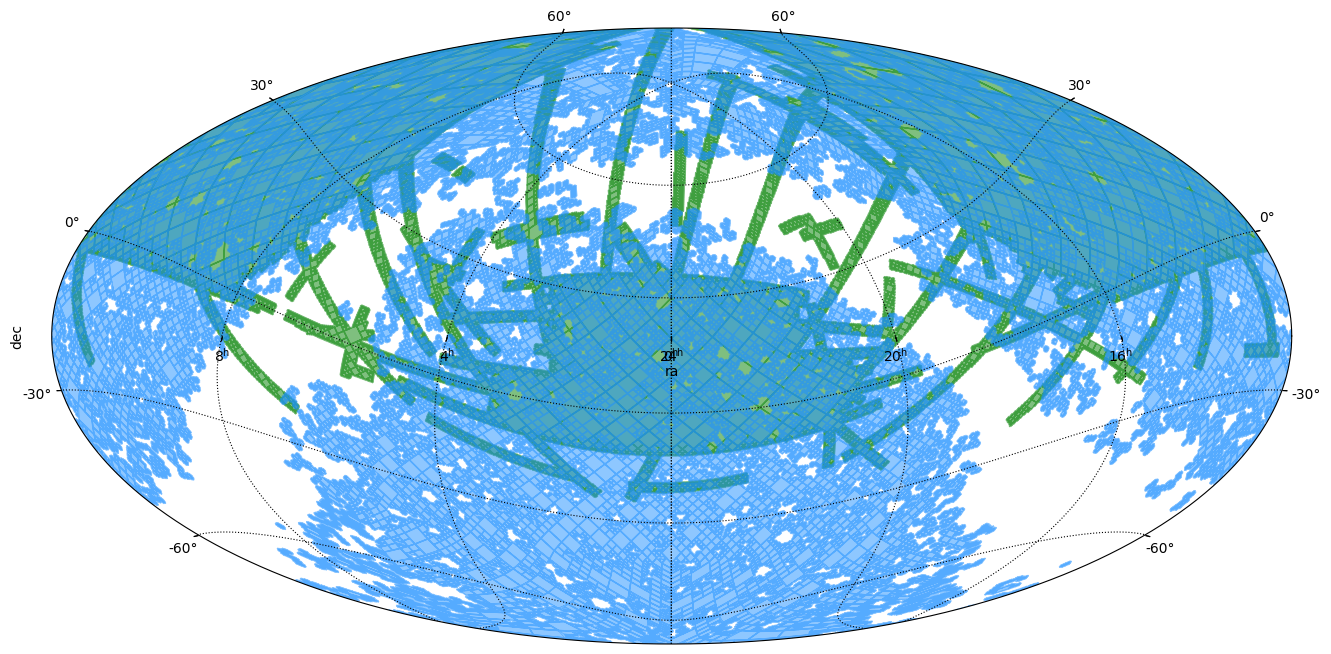

In [4]:
fig = plt.figure(111, figsize=(16, 8))


with WCS(
    fig,
    fov=160 * u.deg,
    center=SkyCoord(0, 20, unit="deg", frame="icrs"),
    coordsys="icrs",
    rotation=Angle(0, u.degree),
    projection="AIT",
) as wcs:
    ax = fig.add_subplot(1, 1, 1, projection=wcs, frame_class=EllipticalFrame)

    %time m1.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="green")
    %time m2.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="dodgerblue")

plt.xlabel("ra")
plt.ylabel("dec")
plt.grid(color="black", linestyle="dotted")

We can compute the intersection between the 2 MOC:

CPU times: user 2.44 s, sys: 36.4 ms, total: 2.48 s
Wall time: 2.47 s
CPU times: user 1.62 s, sys: 58 ms, total: 1.67 s
Wall time: 1.62 s


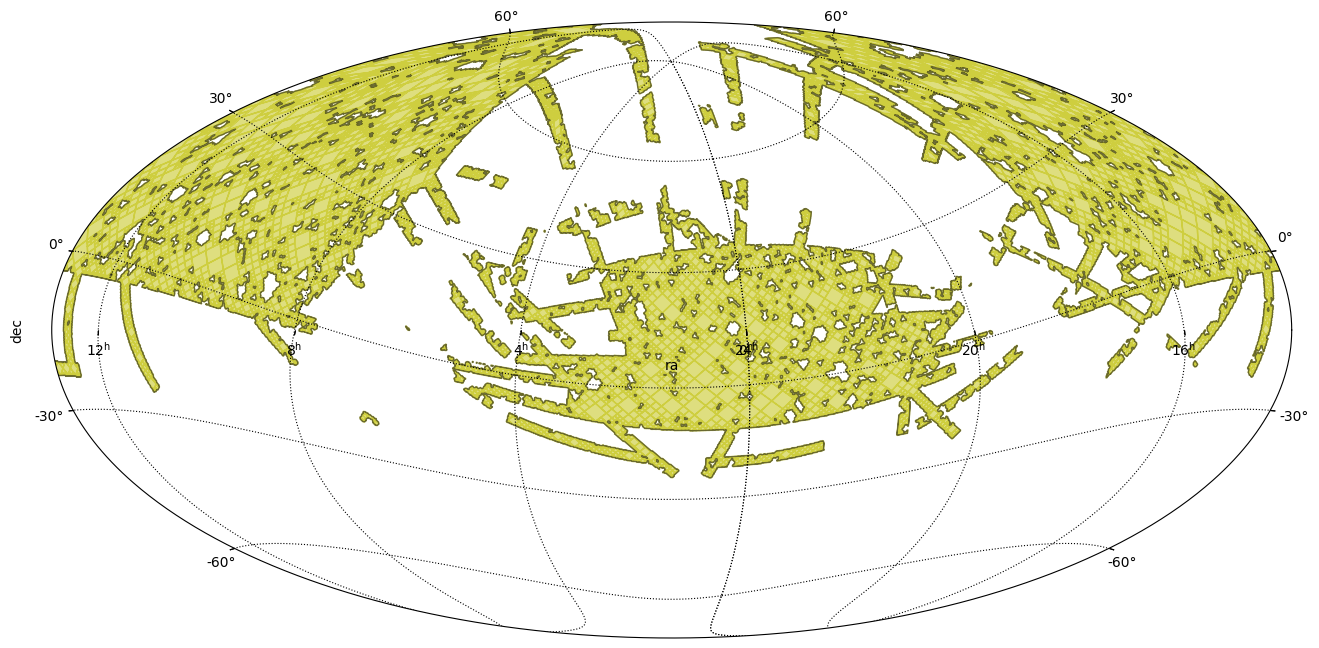

In [5]:
m_intersect = m1.intersection(m2)

fig = plt.figure(111, figsize=(16, 8))

with WCS(
    fig,
    fov=160 * u.deg,
    center=SkyCoord(20, 15, unit="deg", frame="icrs"),
    coordsys="icrs",
    rotation=Angle(0, u.degree),
    projection="AIT",
) as wcs:
    ax = fig.add_subplot(1, 1, 1, projection=wcs, frame_class=EllipticalFrame)

    %time m_intersect.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="y")
    %time m_intersect.border(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="black")

plt.xlabel("ra")
plt.ylabel("dec")
plt.grid(color="black", linestyle="dotted")

And serialize it to FITS (official serialization):

In [7]:
%time hdulist = m_intersect.serialize(format='fits')

CPU times: user 1.97 ms, sys: 0 ns, total: 1.97 ms
Wall time: 1.99 ms


# MOC can also be serialized in JSON:

m_intersect.to_string(format='json')

# Or write it directly to a FITS/JSON file:

m_intersect.save(path="/tmp/moc", write_to_file=True, format='json')
